1. https://analyticsindiamag.com/a-guide-to-varma-with-auto-arima-in-time-series-modelling/
2. https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/
3. https://analyticsindiamag.com/a-complete-tutorial-on-time-series-filters/
4. https://towardsdatascience.com/prediction-task-with-multivariate-timeseries-and-var-model-47003f629f9
6. https://michael-fuchs-python.netlify.app/2020/10/29/time-series-analysis-regression-extension-techniques-for-forecasting-multivariate-variables/
6. https://www.statology.org/ljung-box-test-python/
7. 

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = "/content/drive/My Drive/data/Dow_Jones.csv"
data_Dow_Jones = pd.read_csv(path)

In [ ]:
data_Dow_Jones['Open'].replace(',','', regex=True, inplace=True)
data_Dow_Jones['High'].replace(',','', regex=True, inplace=True)
data_Dow_Jones['Low'].replace(',','', regex=True, inplace=True)
data_Dow_Jones['Close'].replace(',','', regex=True, inplace=True)

In [ ]:
data_Dow_Jones['Date']= pd.to_datetime(data_Dow_Jones['Date'])
data_Dow_Jones['Open'] = data_Dow_Jones['Open'].astype(float, errors = 'raise')
data_Dow_Jones['High'] = data_Dow_Jones['High'].astype(float, errors = 'raise')
data_Dow_Jones['Low'] = data_Dow_Jones['Low'].astype(float, errors = 'raise')
data_Dow_Jones['Close'] = data_Dow_Jones['Close'].astype(float, errors = 'raise')

In [ ]:
data_Dow_Jones.head()

,Date,Open,High,Low,Close
0,2021-12-23,35782.42,36060.99,35782.42,35950.56
1,2021-12-22,35491.71,35764.67,35433.13,35753.89
2,2021-12-21,35069.50,35508.96,35069.50,35492.70
3,2021-12-20,35222.12,35222.12,34665.50,34932.16
4,2021-12-17,35800.11,35800.11,35284.26,35365.44


In [ ]:
data_Dow_Jones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    251 non-null    datetime64[ns]
 1   Open    251 non-null    float64       
 2   High    251 non-null    float64       
 3   Low     251 non-null    float64       
 4   Close   251 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 9.9 KB


In [ ]:
data_Dow_Jones['Date']

0     2021-12-23
1     2021-12-22
2     2021-12-21
3     2021-12-20
4     2021-12-17
         ...    
246   2021-01-04
247   2020-12-31
248   2020-12-30
249   2020-12-29
250   2020-12-28
Name: Date, Length: 251, dtype: datetime64[ns]

In [ ]:
data_Dow_Jones.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [39]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    print(type(series))
    dftest = adfuller(series.to_numpy(), autolag='AIC')
    #print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:")
        print("Fail to reject the null hypothesis")
        print("series is non-stationary")

In [ ]:
for name, column in data_Dow_Jones[['Open', 'High', 'Low', 'Close']].iteritems():
  #print(data_Dow_Jones[name])
  Augmented_Dickey_Fuller_Test_func(data_Dow_Jones[name],name)
  print('\n')

Results of Dickey-Fuller Test for column: Open
<class 'pandas.core.series.Series'>
Test Statistic                  -0.350002
p-value                          0.918118
No Lags Used                     0.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64
Conclusion:
Fail to reject the null hypothesis
series is non-stationary


Results of Dickey-Fuller Test for column: High
<class 'pandas.core.series.Series'>
Test Statistic                  -0.046871
p-value                          0.954480
No Lags Used                     0.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64
Conclusion:
Fail to reject the null hypothesis
series is non-stationary


Results of Dickey-Fuller Test for column: Low
<class 'pandas.core.se

In [ ]:
X = data_Dow_Jones[['Open', 'High', 'Low', 'Close' ]]
train, test = X[0:-30], X[-30:]

In [ ]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [ ]:
for name, column in train_diff[['Open', 'High', 'Low', 'Close' ]].iteritems():
    Augmented_Dickey_Fuller_Test_func(train_diff[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Open
<class 'pandas.core.series.Series'>
Test Statistic                -1.143022e+01
p-value                        6.544481e-21
No Lags Used                   1.000000e+00
Number of Observations Used    2.180000e+02
Critical Value (1%)           -3.460708e+00
Critical Value (5%)           -2.874891e+00
Critical Value (10%)          -2.573886e+00
dtype: float64
Conclusion:
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: High
<class 'pandas.core.series.Series'>
Test Statistic                -1.353339e+01
p-value                        2.595505e-25
No Lags Used                   0.000000e+00
Number of Observations Used    2.190000e+02
Critical Value (1%)           -3.460567e+00
Critical Value (5%)           -2.874830e+00
Critical Value (10%)          -2.573853e+00
dtype: float64
Conclusion:
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: Low
<class 'pandas.core.se

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df): 
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6): 
        return str(val).ljust(length)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [ ]:
cointegration_test(train_diff[['Open', 'High', 'Low', 'Close']])

Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Open   >  323.2     > 40.1749   =>   True
High   >  210.88    > 24.2761   =>   True
Low    >  114.22    > 12.3212   =>   True
Close  >  34.34     > 4.1296    =>   True


In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima

In [ ]:
pq = []
for name, column in train_diff[[ 'Open', 'High', 'Low', 'Close'  ]].iteritems():
    print(f'Searching order of p and q for : {name}')
    stepwise_model = auto_arima(train_diff[name],start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
    parameter = stepwise_model.get_params().get('order')
    print(f'optimal order for:{name} is: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

Searching order of p and q for : Open
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3042.404, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3039.679, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3041.280, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3041.194, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3040.190, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.640 seconds
optimal order for:Open is: (0, 0, 0) 


Searching order of p and q for : High
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2949.170, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2948.417, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2948.260, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2947.755, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2948.306, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2949.347, Time=0.29

In [ ]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns: 
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

In [ ]:
pq

[(0, 0, 0), (0, 0, 1), (1, 0, 2), (0, 0, 0)]

In [ ]:
df_results_moni = pd.DataFrame(columns=['p', 'q','RMSE Open','RMSE High','RMSE Low','RMSE Close'])
print('Grid Search Started')
start = timer()
for i in pq:
    if i[0]== 0 and i[2] ==0:
        pass
    else:
        print(f' Running for {i}')
        model = VARMAX(train_diff[[ 'Open', 'High', 'Low', 'Close'   ]], order=(i[0],i[2])).fit( disp=False)
        result = model.forecast(steps = 30)
        inv_res = inverse_diff(data_Dow_Jones[[ 'Open', 'High', 'Low', 'Close'   ]] , result)
        Opensrmse = np.sqrt(metrics.mean_squared_error(test['Open'], inv_res.Open_1st_inv_diff))
        Highrmse = np.sqrt(metrics.mean_squared_error(test['High'], inv_res.High_1st_inv_diff))
        Lowrmse = np.sqrt(metrics.mean_squared_error(test['Low'], inv_res.Low_1st_inv_diff))
        Closermse = np.sqrt(metrics.mean_squared_error(test['Close'], inv_res.Close_1st_inv_diff))
        df_results_moni = df_results_moni.append({'p': i[0], 'q': i[2], 'RMSE Open':Opensrmse,'RMSE High':Highrmse,'RMSE Low':Lowrmse,'RMSE Close':Closermse }, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')

Grid Search Started
 Running for (0, 0, 1)
 Running for (1, 0, 2)
 Total time taken to complete grid search in seconds: 19.038007800000287


In [ ]:
df_results_moni.sort_values(by = ['RMSE Open','RMSE High','RMSE Low','RMSE Close'] )

,p,q,RMSE Open,RMSE High,RMSE Low,RMSE Close
1,1.0,2.0,772.754990,684.152532,565.143333,692.477699
0,0.0,1.0,862.506186,763.539613,659.625263,763.705642


In [ ]:
# from above example we can see that p=0 and q=2 gives least RMSE
model = VARMAX(train_diff[[ 'Open', 'High', 'Low', 'Close' ]], order=(1,2)).fit( disp=False)
result = model.forecast(steps = 30)

In [ ]:
res = inverse_diff(data_Dow_Jones[['Open', 'High', 'Low', 'Close' ]],result)

In [ ]:
res

,Open,High,Low,Close,Open_1st_inv_diff,High_1st_inv_diff,Low_1st_inv_diff,Close_1st_inv_diff
220,20.065936,39.354366,113.555372,7.489467,30303.295936,30564.914366,30396.785372,30411.459467
221,26.271127,7.047690,19.334130,3.494635,30329.567063,30571.962055,30416.119503,30414.954102
222,-23.054116,0.018618,4.676603,24.896310,30306.512947,30571.980674,30420.796105,30439.850413
223,-18.369231,-24.761648,-27.404379,-31.851058,30288.143716,30547.219025,30393.391726,30407.999354
224,-17.793494,-18.398724,-14.437002,-15.576222,30270.350222,30528.820301,30378.954724,30392.423132
225,-17.875976,-18.655177,-17.763741,-18.259786,30252.474246,30510.165124,30361.190984,30374.163346
226,-17.985569,-18.996888,-16.933196,-17.813110,30234.488677,30491.168236,30344.257787,30356.350236
227,-17.921322,-18.819864,-17.194517,-17.991657,30216.567355,30472.348372,30327.063271,30338.358579
228,-17.941797,-18.903323,-17.109203,-17.913644,30198.625559,30453.445049,30309.954068,30320.444935
229,-17.937553,-18.856516,-17.127243,-17.933329,30180.688005,30434.588533,30292.826825,30302.511606


In [ ]:
for i in ['Open', 'High', 'Low', 'Close' ]:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

Evaluation metric for Open
Evaluation metric results:-
MSE is : 597150.2752610637
MAE is : 708.8245950877065
RMSE is : 772.7549904472074
MAPE is : 2.293200228584371
R2 is : -3.9594940593535144

Evaluation metric for High
Evaluation metric results:-
MSE is : 468064.6870669973
MAE is : 637.994887421389
RMSE is : 684.1525320182608
MAPE is : 2.0548644069168445
R2 is : -4.600098198969386

Evaluation metric for Low
Evaluation metric results:-
MSE is : 319386.98640223657
MAE is : 494.4511000956702
RMSE is : 565.1433326176967
MAPE is : 1.6056740261047733
R2 is : -1.0802724184457428

Evaluation metric for Close
Evaluation metric results:-
MSE is : 479525.36397752835
MAE is : 630.2490417852598
RMSE is : 692.4776992636863
MAPE is : 2.036938588281104
R2 is : -2.595498224265956



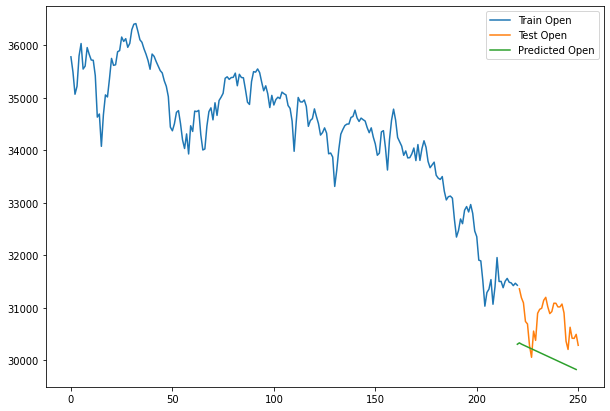

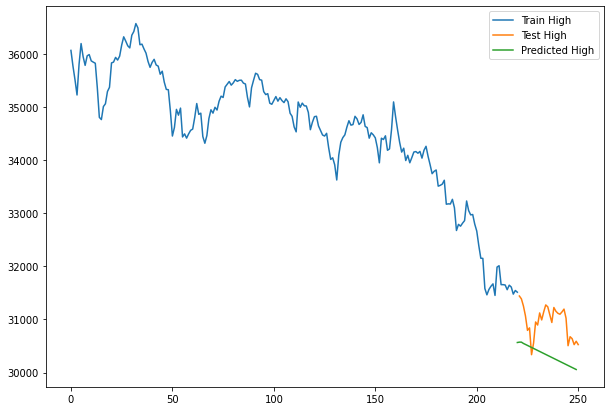

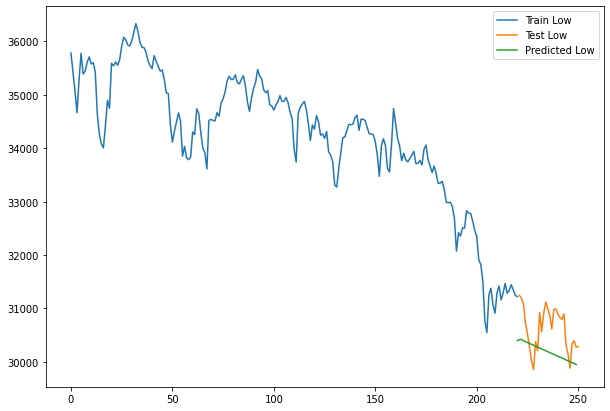

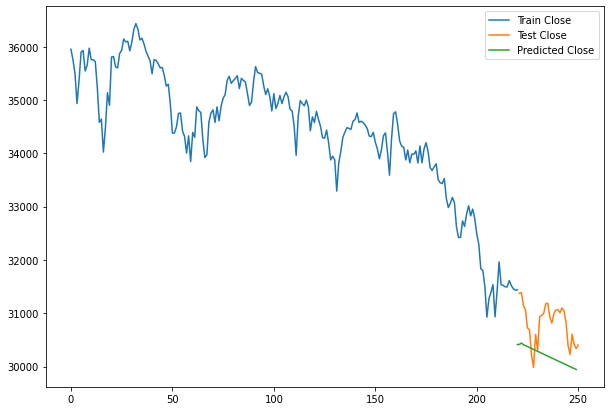

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in ['Open', 'High', 'Low', 'Close' ]:
    
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot( train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()

***LSTM***
1. https://www.kaggle.com/nicapotato/keras-timeseries-multi-step-multi-output
2. https://www.kaggle.com/questions-and-answers/76788
3. https://www.kdnuggets.com/2021/10/multivariate-time-series-analysis-lstm-based-rnn.html
4. https://towardsdatascience.com/cnn-lstm-based-models-for-multiple-parallel-input-and-multi-step-forecast-6fe2172f7668
5. https://pangkh98.medium.com/multi-step-multivariate-time-series-forecasting-using-lstm-92c6d22cd9c2
6. https://github.com/awslabs/gluon-ts/issues/1095
7. https://www.youtube.com/watch?v=UhxCsweuKE4
8. https://www.hcltech.com/blogs/forecasting-model-innovations-power-ai-transformation
9. https://ts.gluon.ai/api/gluonts/gluonts.model.deepar.html
10. https://github.com/awslabs/gluon-ts/issues/1095
11. https://stackoverflow.com/questions/56196993/time-series-forecasting-with-deepar-for-multiple-independent-products
12. https://towardsdatascience.com/deep-learning-for-time-series-data-ed410da30798
13. https://www.youtube.com/watch?v=xcbj0RE3kfI  (DeepAR univariate)
14. https://stackoverflow.com/questions/41947039/keras-rnn-with-lstm-cells-for-predicting-multiple-output-time-series-based-on-mu
15. https://datascience.stackexchange.com/questions/44249/using-lstms-on-multivariate-input-and-multivariate-output
16. https://datascience.stackexchange.com/questions/44249/using-lstms-on-multivariate-input-and-multivariate-output
17. https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
18. https://colab.research.google.com/drive/1JwDl3HZ9SfvV5crtjbuFPaU_T7Q1y34w?usp=sharing
19. https://www.analyticsvidhya.com/blog/2020/10/multivariate-multi-step-time-series-forecasting-using-stacked-lstm-sequence-to-sequence-autoencoder-in-tensorflow-2-0-keras/
20. https://github.com/niklascp/bus-arrival-convlstm/blob/master/jupyter/ConvLSTM_3x15min_10x64-5x64-10x64-5x64.ipynb
21. https://www.kaggle.com/nicapotato/keras-timeseries-multi-step-multi-output
22. https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/
23. https://www.kaggle.com/questions-and-answers/76788
24. https://ts.gluon.ai/tutorials/forecasting/extended_tutorial.html


In [ ]:
features = ['Open', 'High', 'Low', 'Close' ]

In [ ]:
X = data_Dow_Jones[['Open', 'High', 'Low', 'Close' ]]
train, test = X[0:-30], X[-30:]

In [ ]:
data_mean = train.mean(axis=0)
data_std = train.std(axis=0)
dataset = (train-data_mean)/data_std

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    221 non-null    float64
 1   High    221 non-null    float64
 2   Low     221 non-null    float64
 3   Close   221 non-null    float64
dtypes: float64(4)
memory usage: 7.0 KB


In [ ]:
dataset = pd.DataFrame(dataset)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cdc2a8510>,
      dtype=object)

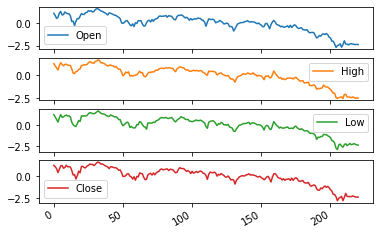

In [ ]:
dataset.plot(subplots=True)

In [ ]:
!pip install --upgrade mxnet==1.6.0
!pip install gluonts

     |████████████████████████████████| 68.7 MB 93 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 2.1 MB 5.4 MB/s 
     |████████████████████████████████| 10.1 MB 45.5 MB/s 


In [ ]:
import matplotlib as mpl
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer


In [ ]:
data_Dow_Jones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    251 non-null    datetime64[ns]
 1   Open    251 non-null    float64       
 2   High    251 non-null    float64       
 3   Low     251 non-null    float64       
 4   Close   251 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 9.9 KB


In [ ]:
data_Dow_Jones.set_index('Date' , inplace= True)

In [ ]:
data_Dow_Jones.head()

,Open,High,Low,Close
Date,,,,
2021-12-23,35782.42,36060.99,35782.42,35950.56
2021-12-22,35491.71,35764.67,35433.13,35753.89
2021-12-21,35069.50,35508.96,35069.50,35492.70
2021-12-20,35222.12,35222.12,34665.50,34932.16
2021-12-17,35800.11,35800.11,35284.26,35365.44


In [ ]:
# train and test split
X = data_Dow_Jones[['Open', 'High', 'Low', 'Close' ]]
train, test = X[0:-30], X[-30:]

build lstm with multiple input and multiple output

In [ ]:
def build_model():
    model = Sequential()

    model.add(LSTM(
        input_shape=(50,3),
        return_sequences=True, units=50))
    model.add(Dropout(0.2))

    model.add(LSTM(
        250,
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(TimeDistributed(Dense(3)))
    model.add(Activation("linear"))

    model.compile(loss="mse", optimizer="rmsprop")
    return model

***LSTM***

In [ ]:
# multivariate data preparation

# multivariate lstm example
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from numpy import array
from numpy import hstack

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

(7, 3, 2) (7,)
[[10 15]
 [20 25]
 [30 35]] 65
[[20 25]
 [30 35]
 [40 45]] 85
[[30 35]
 [40 45]
 [50 55]] 105
[[40 45]
 [50 55]
 [60 65]] 125
[[50 55]
 [60 65]
 [70 75]] 145
[[60 65]
 [70 75]
 [80 85]] 165
[[70 75]
 [80 85]
 [90 95]] 185


In [ ]:
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[205.9245]]


In [ ]:
# try to fit multiple output

***MULTIPLE PARALLEL SERIES***

In [ ]:
# multivariate output stacked lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [ ]:
data_Dow_Jones.head()

,Date,Open,High,Low,Close
0,2021-12-23,35782.42,36060.99,35782.42,35950.56
1,2021-12-22,35491.71,35764.67,35433.13,35753.89
2,2021-12-21,35069.50,35508.96,35069.50,35492.70
3,2021-12-20,35222.12,35222.12,34665.50,34932.16
4,2021-12-17,35800.11,35800.11,35284.26,35365.44


In [ ]:
X = data_Dow_Jones[['Open', 'High', 'Low', 'Close' ]]
train, test = X[0:-30], X[-30:]

In [ ]:
seq_lstm = train[['Open', 'High', 'Low', 'Close']].values

In [ ]:
len(seq_lstm)

221

In [ ]:
def split_sequences(sequences, n_steps):
  print("len(sequences)")
  X, y = list(), list()
  for i in range(len(sequences)):
    # find the end of this pattern
    end_ix = i + n_steps
    if end_ix > len(sequences)-1:
      break
    seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
    X.append(seq_x)
    y.append(seq_y)
    print(seq_x)
    print(seq_y)
  return array(X), array(y)


In [ ]:
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(seq_lstm, n_steps)

In [ ]:
# define model
n_features = X.shape[2]
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X, y, epochs=400, verbose=1)

In [ ]:
# last 3 values of the time series
input = X[-1]

In [ ]:
input

array([[31472.08, 31608.63, 31443.48, 31522.75],
       [31420.8 , 31475.31, 31347.8 , 31458.4 ],
       [31466.49, 31543.82, 31244.36, 31430.7 ]])

In [ ]:
input_sample = []
for i in input:
  #print(i)
  input_sample.append(i)


[31472.08 31608.63 31443.48 31522.75]
[31420.8  31475.31 31347.8  31458.4 ]
[31466.49 31543.82 31244.36 31430.7 ]


In [ ]:
input_sample

[array([31472.08, 31608.63, 31443.48, 31522.75]),
 array([31420.8 , 31475.31, 31347.8 , 31458.4 ]),
 array([31466.49, 31543.82, 31244.36, 31430.7 ]),
 array([[31385.494, 31560.559, 31216.156, 31407.82 ]], dtype=float32)]

In [ ]:
x_input = input.reshape((1, n_steps, n_features))
print(x_input.shape)
print(x_input)
yhat = model.predict(x_input, verbose=0)
#print(yhat)

(1, 3, 4)
[[[31472.08 31608.63 31443.48 31522.75]
  [31420.8  31475.31 31347.8  31458.4 ]
  [31466.49 31543.82 31244.36 31430.7 ]]]


In [ ]:
# demonstrate prediction for next 10 days
#x_input = array(x_input)
temp_input= input    #list(input)
lst_output=[]
k=0
while(k<30):
    #new_input = 
    if(len(temp_input)>3):
        #print(temp_input)
        #x_input=array(temp_input[1:])
        #x_input = np.delete(temp_input, 0)
        #print(temp_input)
        new_input = []
        #print(len(temp_input))
        for i in range(1,len(temp_input)):
          #if(i==1):
          #  print(temp_input[i])
          #print(temp_input[i])
          new_input.append(temp_input[i])
        #print("{} day input {}".format(i,x_input))
        #print(len(new_input))
        new_input = np.asarray(new_input) 
        #print(new_input)
        #new_input = 
        x_input = new_input.reshape((1, n_steps, n_features))
        #print(x_input.shape)
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print(yhat)
        #lst_output.append(yhat[0])
        lst = []
        for i in new_input:
          templst = []
          for j in range(0,len(i)):
            templst.append(i[j])
          lst.append(templst)
        #lst.append(yhat[0])
        pred_lst = yhat[0].tolist()
        #print(pred_lst)
        lst.append(pred_lst)
        temp_input = lst
        #break
        #print("{} day output {}".format(i,yhat))
        #temp_input.append(yhat[0][0])
        #temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0].tolist())
        k=k+1
        #print(k)
    else:
        x_input = temp_input.reshape(1, n_steps, n_features)
        yhat = model.predict(x_input, verbose=0)
        #lst_output.append(yhat[0])
        lst = []
        for i in temp_input:
          templst = []
          for j in range(0,len(i)):
            templst.append(i[j])
          lst.append(templst)
        #for l in lst:
        #  print(type(l)) 
        pred_lst = yhat[0].tolist()
        #print(type(pred_lst))
        lst.append(pred_lst)
        #print(type(yhat[0]))
        temp_input = lst

        #print(f"first output{temp_input}")
        #for l in temp_input:
        #print(l)
        lst_output.append(yhat[0].tolist())
        k=k+1
    

print(lst_output)

[[31385.494140625, 31560.55859375, 31216.15625, 31407.8203125], [31345.884765625, 31519.96484375, 31178.228515625, 31370.869140625], [31333.4375, 31509.060546875, 31168.09765625, 31356.072265625], [31307.9140625, 31483.810546875, 31145.26953125, 31331.90234375], [31281.203125, 31456.484375, 31118.697265625, 31305.654296875], [31261.56640625, 31437.041015625, 31098.986328125, 31285.474609375], [31237.45703125, 31412.734375, 31075.099609375, 31261.55859375], [31213.705078125, 31388.75390625, 31051.45703125, 31237.876953125], [31191.650390625, 31366.673828125, 31029.48828125, 31215.654296875], [31168.197265625, 31343.052734375, 31006.181640625, 31192.2578125], [31145.107421875, 31319.818359375, 30983.201171875, 31169.15625], [31122.384765625, 31296.9921875, 30960.591796875, 31146.37890625], [31099.259765625, 31273.7265625, 30937.595703125, 31123.26171875], [31076.31640625, 31250.658203125, 30914.76953125, 31100.30078125], [31053.455078125, 31227.666015625, 30892.0234375, 31077.408203125],

Facebook prophet 
https://github.com/srivatsan88/End-to-End-Time-Series/blob/master/Multiple_Time_Series_using_Prophet.ipynb

In [ ]:
!pip install fbprophet

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px



mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


***LSTM TIME SERIES***
https://github.com/srivatsan88/End-to-End-Time-Series/blob/master/Time_Series_Functions_for_Sequencing.ipynb
https://colab.research.google.com/drive/1b3CUJuDOmPmNdZFH3LQDmt5F0K3FZhqD?usp=sharing

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf



#mpl.rcParams['figure.figsize'] = (10, 8)
#mpl.rcParams['axes.grid'] = False

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = "/content/drive/My Drive/data/Dow_Jones.csv"
data_Dow_Jones = pd.read_csv(path)

In [ ]:
data_Dow_Jones['Open'].replace(',','', regex=True, inplace=True)
data_Dow_Jones['High'].replace(',','', regex=True, inplace=True)
data_Dow_Jones['Low'].replace(',','', regex=True, inplace=True)
data_Dow_Jones['Close'].replace(',','', regex=True, inplace=True)

In [ ]:
data_Dow_Jones['Date']= pd.to_datetime(data_Dow_Jones['Date'])
data_Dow_Jones['Open'] = data_Dow_Jones['Open'].astype(float, errors = 'raise')
data_Dow_Jones['High'] = data_Dow_Jones['High'].astype(float, errors = 'raise')
data_Dow_Jones['Low'] = data_Dow_Jones['Low'].astype(float, errors = 'raise')
data_Dow_Jones['Close'] = data_Dow_Jones['Close'].astype(float, errors = 'raise')

In [ ]:
data_Dow_Jones.head()

,Date,Open,High,Low,Close
0,2021-12-23,35782.42,36060.99,35782.42,35950.56
1,2021-12-22,35491.71,35764.67,35433.13,35753.89
2,2021-12-21,35069.50,35508.96,35069.50,35492.70
3,2021-12-20,35222.12,35222.12,34665.50,34932.16
4,2021-12-17,35800.11,35800.11,35284.26,35365.44


In [ ]:
data_Dow_Jones['Date'] = pd.to_datetime(data_Dow_Jones['Date'], infer_datetime_format=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1cba02c10>,
      dtype=object)

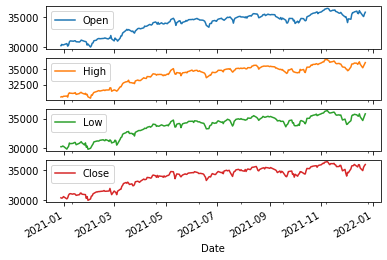

In [ ]:
data_Dow_Jones.set_index('Date')[['Open', 'High', 'Low','Close']].plot(subplots=True)

In [ ]:
df_input = data_Dow_Jones[['Close', 'High', 'Low', 'Open']]

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [ ]:
data_scaled

In [ ]:
features=data_scaled
target= data_scaled[:,0]

In [ ]:
TimeseriesGenerator(features, target, length=7, sampling_rate=1, batch_size=1)[0]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=123, shuffle = False)

In [ ]:
x_train.shape

(175, 4)

In [ ]:
x_test.shape

(76, 4)

In [ ]:
win_length= 7
batch_size=32
num_features=4
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [ ]:
train_generator[0]

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=50,
                    validation_data=test_generator,
                    shuffle=False)
                    #callbacks=[early_stopping])

In [ ]:
model.evaluate_generator(test_generator, verbose=1)  

In [ ]:
predictions=model.predict_generator(test_generator)

In [ ]:
predictions.shape[0]

In [ ]:
y_test

In [ ]:
x_test

In [ ]:
x_test[:,1:][win_length:]

In [ ]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [ ]:
df_pred

In [ ]:
rev_trans=scaler.inverse_transform(df_pred)

In [ ]:
rev_trans

In [ ]:
df_final=df_input[predictions.shape[0]*-1:]

In [ ]:
df_final.count()

In [ ]:
df_final['Close_Pred']=rev_trans[:,0]

In [ ]:
df_final

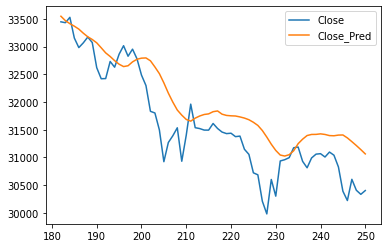

In [ ]:
df_final[['Close','Close_Pred']].plot()

***FACEBOOK PROPHET***
https://github.com/srivatsan88/End-to-End-Time-Series/blob/master/Time_Series_using_Prophet_for_Multivariate.ipynb

In [ ]:
!pip install fbprophet

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = "/content/drive/My Drive/data/Dow_Jones.csv"
data_Dow_Jones = pd.read_csv(path)

In [ ]:
data_Dow_Jones['Open'].replace(',','', regex=True, inplace=True)
data_Dow_Jones['High'].replace(',','', regex=True, inplace=True)
data_Dow_Jones['Low'].replace(',','', regex=True, inplace=True)
data_Dow_Jones['Close'].replace(',','', regex=True, inplace=True)

In [ ]:
data_Dow_Jones['Date']= pd.to_datetime(data_Dow_Jones['Date'])
data_Dow_Jones['Open'] = data_Dow_Jones['Open'].astype(float, errors = 'raise')
data_Dow_Jones['High'] = data_Dow_Jones['High'].astype(float, errors = 'raise')
data_Dow_Jones['Low'] = data_Dow_Jones['Low'].astype(float, errors = 'raise')
data_Dow_Jones['Close'] = data_Dow_Jones['Close'].astype(float, errors = 'raise')

In [ ]:
data_Dow_Jones.head()

In [ ]:
data_Dow_Jones['Date'] = pd.to_datetime(data_Dow_Jones['Date'], infer_datetime_format=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4143ec0d0>,
      dtype=object)

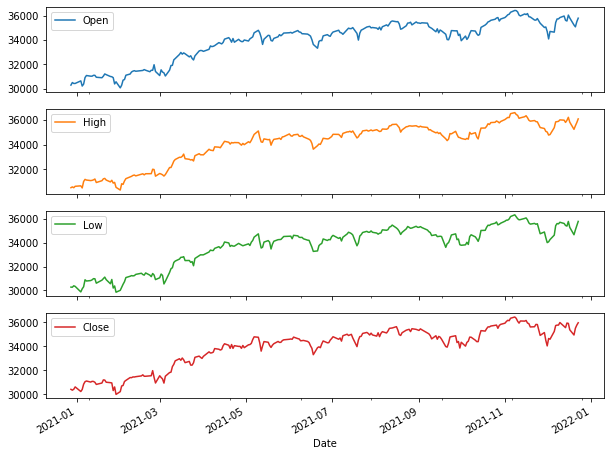

In [ ]:
data_Dow_Jones.set_index('Date')[['Open', 'High', 'Low','Close']].plot(subplots=True)

In [ ]:
data_Dow_Jones=data_Dow_Jones.reset_index()[['Date','Open','High', 'Low', 'Close']].rename({'Date':'ds','Close':'y','Low':'Low', 'High':'High', 'Open':'Open'}, axis='columns')

In [ ]:
data_Dow_Jones

In [ ]:
train, test = data_Dow_Jones[0:-76], data_Dow_Jones[-76:]

In [ ]:
train.shape

(175, 5)

In [ ]:
test.shape

(76, 5)

In [ ]:
from fbprophet import Prophet
m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [ ]:
m.add_regressor('Open',standardize=False)
m.add_regressor('High',standardize=False)
m.add_regressor('Low',standardize=False)

In [ ]:
m.fit(train)

In [ ]:
m.params

In [ ]:
future = m.make_future_dataframe(periods=76)
future.tail()

In [ ]:
future['Open'] = data_Dow_Jones['Open']
future['Low'] = data_Dow_Jones['Low']
future['High'] = data_Dow_Jones['High']


In [ ]:
future

,ds,Open,Low,High
0,2021-04-19,35782.42,35782.42,36060.99
1,2021-04-20,35491.71,35433.13,35764.67
2,2021-04-21,35069.50,35069.50,35508.96
3,2021-04-22,35222.12,34665.50,35222.12
4,2021-04-23,35800.11,35284.26,35800.11
...,...,...,...,...
246,2022-03-05,30627.47,29881.82,30674.28
247,2022-03-06,30417.64,30344.50,30637.47
248,2022-03-07,30415.09,30393.04,30525.35
249,2022-03-08,30492.07,30274.24,30588.79


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
246,2022-03-05,36388.480062,-39652.632344,105129.922774
247,2022-03-06,36395.798405,-31970.486181,108134.529257
248,2022-03-07,36403.431429,-38758.089991,107727.321692
249,2022-03-08,36410.952698,-34939.978633,105054.140952
250,2022-03-09,36418.813495,-36737.021671,106874.129758


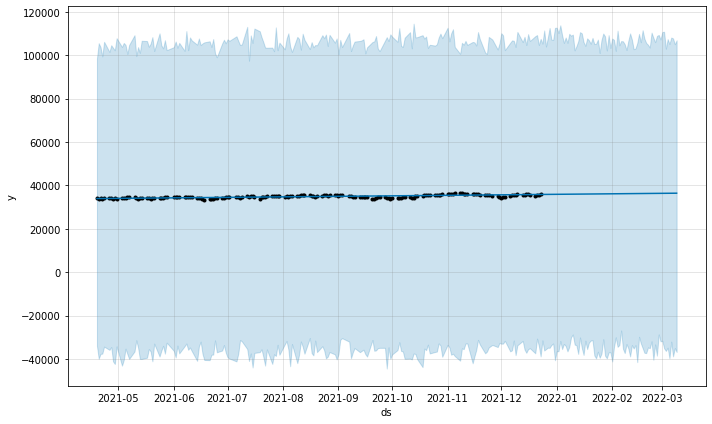

In [ ]:
fig1 = m.plot(forecast)

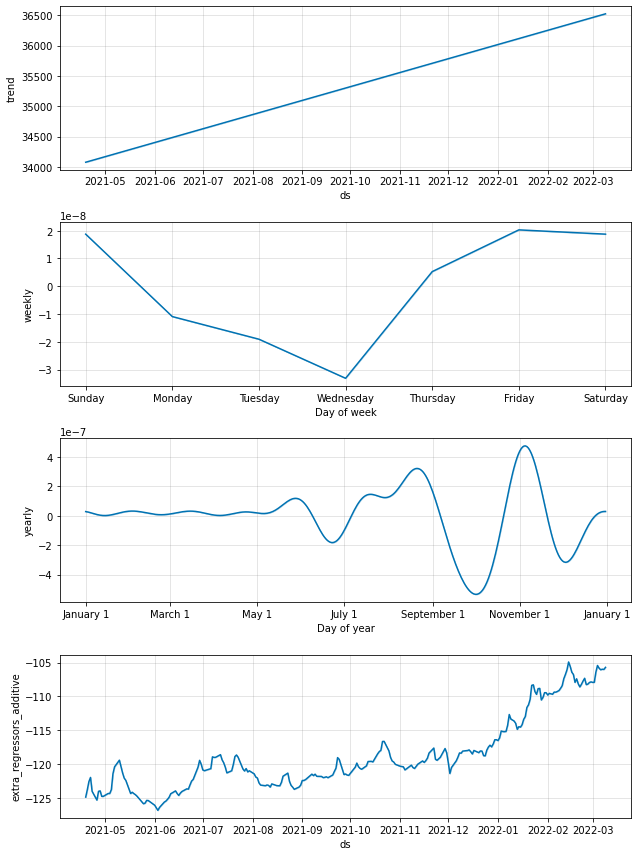

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '175 days', horizon = '60 days')
df_p = performance_metrics(cv_results)
df_p

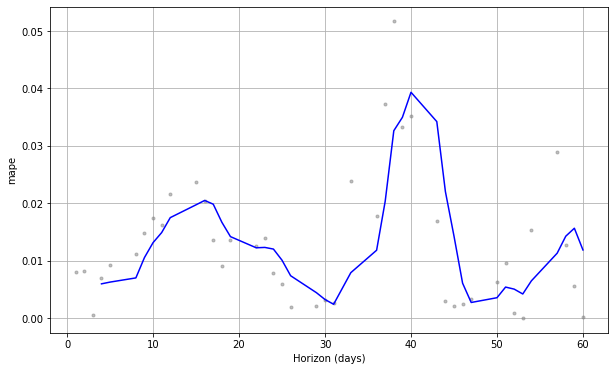

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mape')

In [ ]:
forecast.shape


(251, 31)

In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'High', 'High_lower', 'High_upper', 'Low', 'Low_lower', 'Low_upper',
       'Open', 'Open_lower', 'Open_upper', 'additive_terms',
       'additive_terms_lower', 'additive_terms_upper',
       'extra_regressors_additive', 'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast['Close'] = data_Dow_Jones['y']

In [ ]:
final_pred = forecast[['Close', 'yhat']]

In [ ]:
final_pred

,Close,yhat
0,35950.56,33952.734393
1,35753.89,33961.371344
2,35492.70,33970.130032
3,34932.16,33978.299652
4,35365.44,33983.793649
...,...,...
246,30223.89,36388.480062
247,30606.48,36395.798405
248,30409.56,36403.431429
249,30335.67,36410.952698


In [42]:
timeseries_evaluation_metrics_func(final_pred['Close'], final_pred['yhat'])

Evaluation metric results:-
MSE is : 7066777.166403728
MAE is : 1969.7649424118015
RMSE is : 2658.341055320729
MAPE is : 6.055123949415073
R2 is : -1.612285633288118

